In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[15,5]
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("facultynb/bigmartsales-cleaned.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [4]:
df["Outlet_Establishment_Year"] = pd.Categorical(df["Outlet_Establishment_Year"])

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,2181.288914,13.414514
std,5.776851,0.051598,62.258099,1706.499616,1.701840
min,0.000000,0.000000,31.300000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,13086.964800,24.000000


In [6]:
df.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,6473,8523
unique,1559,2,16,10,3,8,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 2,Supermarket Type1
freq,10,5517,1232,935,2793,2793,5577


In [7]:
df["Outlet_Establishment_Year"].describe()

count     8523
unique       9
top       1985
freq      1463
Name: Outlet_Establishment_Year, dtype: int64

### missing values

In [8]:
missing_values = df.isnull().sum().sort_values(ascending=0)
print(type(missing_values))
print(missing_values[missing_values>0]/df.shape[0]*100)

<class 'pandas.core.series.Series'>
Outlet_Size             28.276428
Outlet_Location_Type    24.052564
Item_Weight              8.787985
dtype: float64


<Axes: >

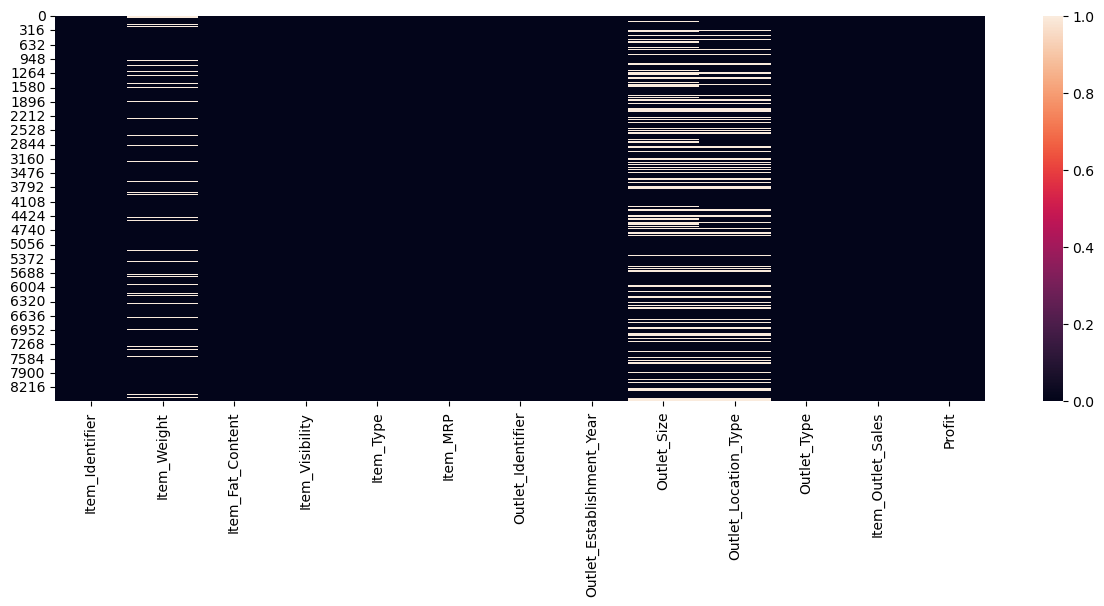

In [9]:
sb.heatmap(df.isnull())

In [10]:
df.shape

(8523, 13)

In [11]:
nonna_df = df.dropna()
nonna_df.shape
nonna_df.shape[0]/df.shape[0]

0.6293558606124604

In [12]:
df.dropna().shape[0] / df.shape[0]

0.6293558606124604

In [13]:
missing_values

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Weight                   749
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [14]:
# Outlet_Size
# Outlet_Location_Type
# Item_Weight
# Item_Visibility

In [15]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [16]:
df["Outlet_Size"].replace(np.NaN, "Medium",inplace=True)

In [17]:
df["Outlet_Location_Type"].value_counts()
df["Outlet_Location_Type"].replace("?", np.NaN, inplace=True)
df["Outlet_Location_Type"].replace("  -", np.NaN, inplace=True)
df["Outlet_Location_Type"].replace("  --", np.NaN, inplace=True)
df["Outlet_Location_Type"].replace("na", np.NaN, inplace=True)
df["Outlet_Location_Type"].replace("NAN", np.NaN, inplace=True)
df["Outlet_Location_Type"].replace(np.NaN, "Tier 2", inplace=True)
df["Outlet_Location_Type"].replace("Tier1", "Tier 1", inplace=True)
df["Outlet_Location_Type"].value_counts()


Outlet_Location_Type
Tier 2    5203
Tier 1    2388
Tier 3     932
Name: count, dtype: int64

In [18]:
print(df["Item_Weight"].dtype)
print(df["Item_Weight"].describe())
df["Item_Weight"].replace(0,df["Item_Weight"].median(),inplace=True)

float64
count    7774.000000
mean       11.676740
std         5.776851
min         0.000000
25%         7.720000
50%        11.800000
75%        16.500000
max        21.350000
Name: Item_Weight, dtype: float64


In [19]:
df1=df[["Outlet_Location_Type", "Item_Outlet_Sales"]]
df1.groupby(df1["Outlet_Location_Type"]).mean()

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1912.149161
Tier 2,2283.730470
Tier 3,2298.995256


In [20]:
# using logical method to update location type
lindex = np.where(df["Outlet_Location_Type"].isnull())[0]
for ind in lindex:
    if df.loc[ind,"Item_Outlet_Sales"] <= 2100:
        df.loc[ind,"Outlet_Location_Type"] = "Tier 1"
    elif df.loc[ind,"Item_Outlet_Sales"] >= 2500:
        df.loc[ind,"Outlet_Location_Type"] = "Tier 2"
    else:
        df.loc[ind, "Outlet_Location_Type"] = "Tier 3"

df["Outlet_Location_Type"].replace("Tier1", "Tier 1", inplace=True)
df["Outlet_Location_Type"].value_counts()


Outlet_Location_Type
Tier 2    5203
Tier 1    2388
Tier 3     932
Name: count, dtype: int64

In [21]:
df["Item_Visibility"].replace(0, np.NaN, inplace=True)
df["Item_Visibility"].describe()
df["Item_Visibility"].replace(np.NaN, df["Item_Visibility"].mean(), inplace=True)
df["Item_Visibility"].isnull().sum()

0

In [22]:
df["Item_Weight"].replace(0, np.NaN, inplace=True)
df["Item_Weight"].describe()
df["Item_Weight"].replace(np.NaN, df["Item_Weight"].median(), inplace=True)
df["Item_Weight"].isnull().sum()

0

<Axes: >

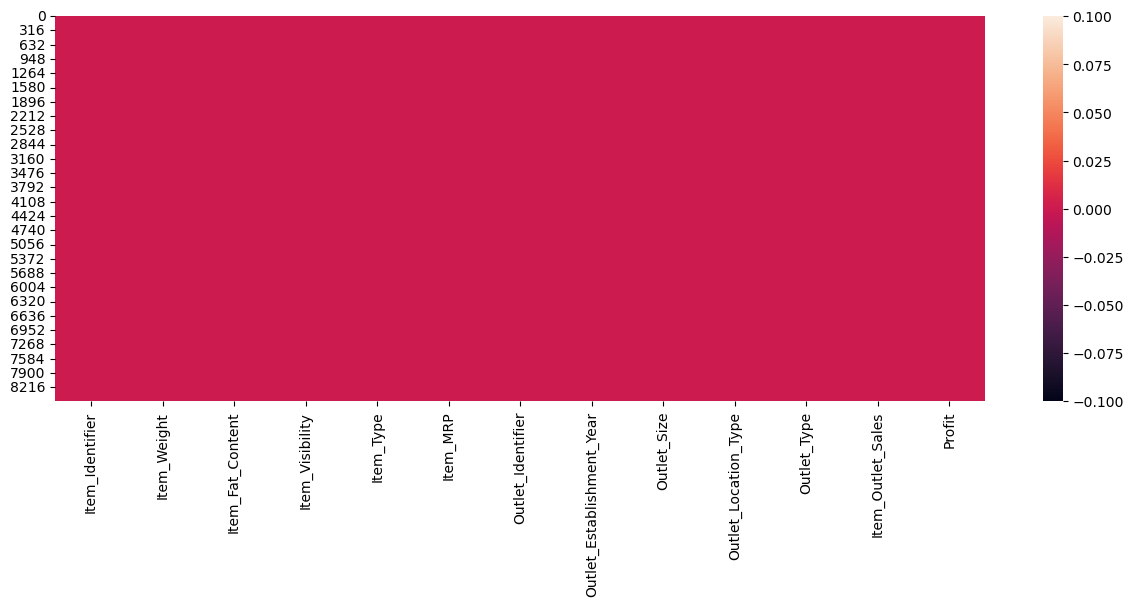

In [23]:
sb.heatmap(df.isnull())

### Encoding

In [24]:
# One-hot encoding using pandas
pd.get_dummies(df, columns=["Item_Type"], dtype=int)
pd.get_dummies(df, columns=["Item_Type"], dtype=int, drop_first=True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300,Low Fat,0.016047,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920,Regular,0.019278,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500,Low Fat,0.016760,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.200,Regular,0.070482,182.1,OUT010,1998,Medium,Tier 2,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,Low Fat,0.070482,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8.380,Regular,0.046982,108.2,OUT045,2002,Medium,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10.600,Low Fat,0.035186,85.1,OUT035,2004,Small,Tier 1,Supermarket Type1,...,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7.210,Regular,0.145221,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,...,0,0,0,0,0,0,0,1,0,0


In [25]:
df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()

df_encode = pd.DataFrame(encode.fit_transform(df[["Outlet_Type"]]).toarray(),
                         columns=["Grocery Store", "Supermarket Type1", "Supermarket Type2", "Supermarket Type3"])

df_encode= pd.concat([df,df_encode], axis=1)

df_encode.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,0.0,1.0,0.0,0.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,0.0,0.0,1.0,0.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,0.0,1.0,0.0,0.0
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier 2,Grocery Store,732.3800,13.6,1.0,0.0,0.0,0.0
4,NCD19,8.93,Low Fat,0.070482,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0.0,1.0,0.0,0.0


In [27]:
# Label encoding

df["Outlet_Size"].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

# df["Outlet_Type"] = labelEncoder.fit_transform(df["Outlet_Type"])
labelEncoder.fit_transform(df["Outlet_Type"])

array([1, 2, 1, ..., 1, 2, 1])

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier 2,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.070482,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [30]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import OrdinalEncoder

order_enconding = OrdinalEncoder(categories=[["Small","Medium","High"]])

df["Ordinal_Outlet_Size"] = order_enconding.fit_transform(df["Outlet_Size"].values.reshape(-1,1))

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Ordinal_Outlet_Size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,1.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1.0
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier 2,Grocery Store,732.3800,13.6,1.0
4,NCD19,8.93,Low Fat,0.070482,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,2.0


In [33]:
# Frequency enconding

encoding = df.groupby("Item_Type").size()
encoding = encoding/len(df)
df["freq_encodeded_item_type"] = df["Item_Type"].map(encoding)*100
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Ordinal_Outlet_Size,freq_encodeded_item_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1.0,8.001877
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,1.0,5.221166
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1.0,4.986507
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier 2,Grocery Store,732.3800,13.6,1.0,14.455004
4,NCD19,8.93,Low Fat,0.070482,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,2.0,10.676992


In [34]:
ls=[]
for i in ['yes','no','yes','no','no','yes','no','no','no','no','no','yes','yes','yes','no','yes','yes','no','no','no','yes','yes','yes','yes','no','no','yes']:
    ls.append(np.random.randint(0,2))
ls

df_smoker = pd.DataFrame(
    {
        'Smoker': ['yes','no','yes','no','no','yes','no','no','no','no','no','yes','yes','yes','no','yes','yes','no','no','no','yes','yes','yes','yes','no','no','yes'],
        'Target': ls
    }
    )

In [35]:
target_percent = df_smoker.groupby('Smoker')['Target'].mean()
print(round(target_percent["yes"],2), round(target_percent["no"],2))

0.69 0.5


In [36]:
df_smoker["target_encoded"] = df_smoker.groupby('Smoker')['Target'].transform('mean')
df_smoker.head()

,Smoker,Target,target_encoded
0,yes,1,0.692308
1,no,0,0.500000
2,yes,1,0.692308
3,no,0,0.500000
4,no,0,0.500000


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

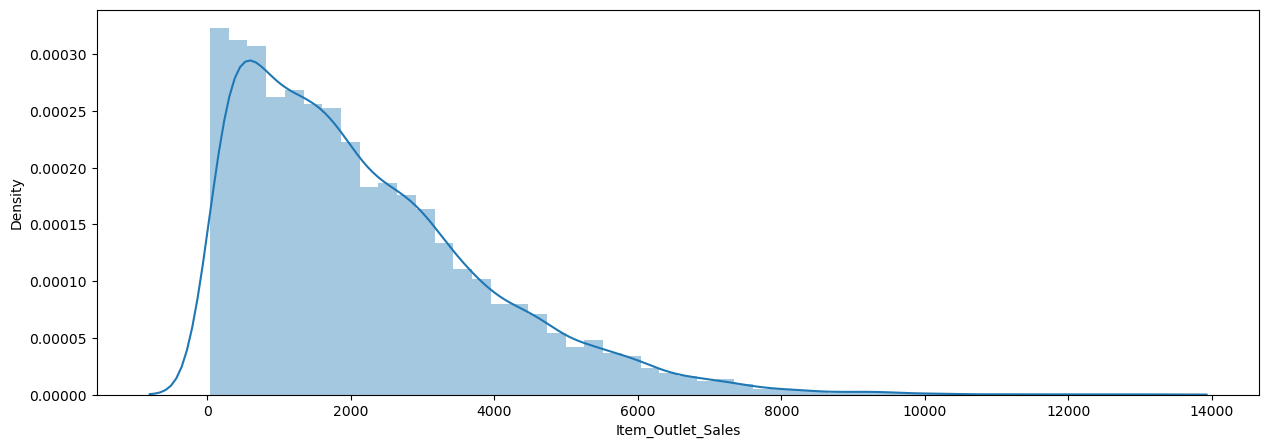

In [37]:
sb.distplot(df["Item_Outlet_Sales"])

In [38]:
print("max value of sales", df["Item_Outlet_Sales"].max())
print("min value of sales", df["Item_Outlet_Sales"].min())
print("mean value of sales", df["Item_Outlet_Sales"].mean())
print("median value of sales", df["Item_Outlet_Sales"].median())
print("skew value of sales", df["Item_Outlet_Sales"].skew())

max value of sales 13086.9648
min value of sales 33.29
mean value of sales 2181.288913575032
median value of sales 1794.331
skew value of sales 1.1775306028542796


max value of sales 6.391044932769205
min value of sales -1.2587901671720854
mean value of sales 1.638174909971368e-16
median value of sales -0.22676865134301713
skew value of sales 1.1775306028542794


<Axes: xlabel='Scaled_Item_Outlet_sales', ylabel='Density'>

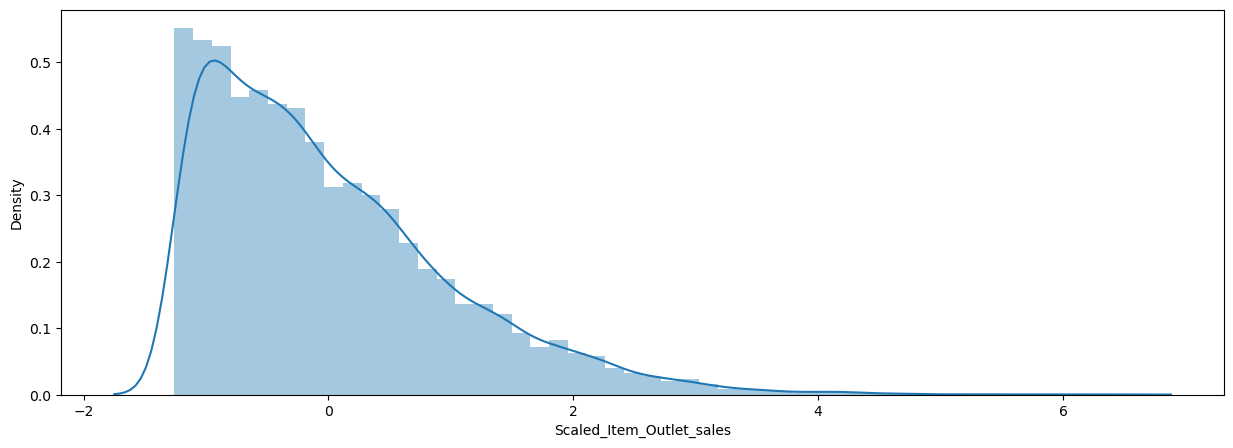

In [39]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df["Scaled_Item_Outlet_sales"] = standard_scaler.fit_transform(df["Item_Outlet_Sales"].values.reshape(-1,1))
print("max value of sales", df["Scaled_Item_Outlet_sales"].max())
print("min value of sales", df["Scaled_Item_Outlet_sales"].min())
print("mean value of sales", df["Scaled_Item_Outlet_sales"].mean())
print("median value of sales", df["Scaled_Item_Outlet_sales"].median())
print("skew value of sales", df["Scaled_Item_Outlet_sales"].skew())
# sb.histplot(df["Scaled_Item_Outlet_sales"],kde=True)
sb.distplot(df["Scaled_Item_Outlet_sales"])

### min-max scalar

1.0 0.0


<Axes: xlabel='min_max_scaled_Item_Outlet_Sales', ylabel='Density'>

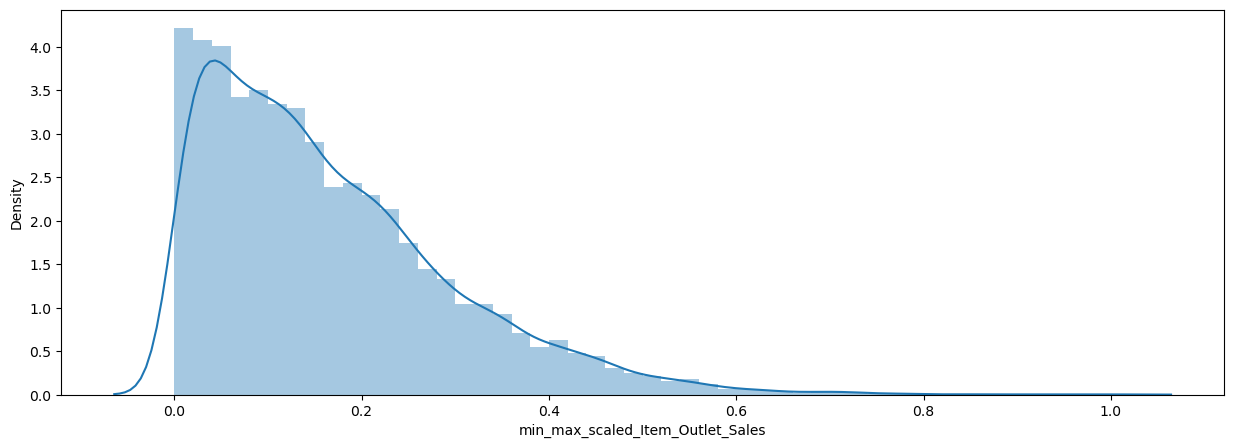

In [40]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df["min_max_scaled_Item_Outlet_Sales"] = min_max_scaler.fit_transform(df[["Item_Outlet_Sales"]])
print(df["min_max_scaled_Item_Outlet_Sales"].max(), df["min_max_scaled_Item_Outlet_Sales"].min())
sb.distplot(df["min_max_scaled_Item_Outlet_Sales"])

In [41]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit', 'Ordinal_Outlet_Size',
       'freq_encodeded_item_type', 'Scaled_Item_Outlet_sales',
       'min_max_scaled_Item_Outlet_Sales'],
      dtype='object')

In [42]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Ordinal_Outlet_Size,freq_encodeded_item_type,Scaled_Item_Outlet_sales,min_max_scaled_Item_Outlet_Sales
0,9.300,0.016047,249.8,3735.1380,11.5,1.0,8.001877,0.910601,0.283587
1,5.920,0.019278,48.3,443.4228,14.3,1.0,5.221166,-1.018440,0.031419
2,17.500,0.016760,141.6,2097.2700,14.5,1.0,4.986507,-0.049238,0.158115
3,19.200,0.070482,182.1,732.3800,13.6,1.0,14.455004,-0.849103,0.053555
4,8.930,0.070482,53.9,994.7052,14.1,2.0,10.676992,-0.695373,0.073651
...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5,2778.3834,14.1,2.0,14.079549,0.349915,0.210293
8519,8.380,0.046982,108.2,549.2850,14.2,1.0,7.602957,-0.956402,0.039529
8520,10.600,0.035186,85.1,1193.1136,9.5,0.0,6.101138,-0.579100,0.088850
8521,7.210,0.145221,103.1,1845.5976,14.2,1.0,14.079549,-0.196725,0.138835


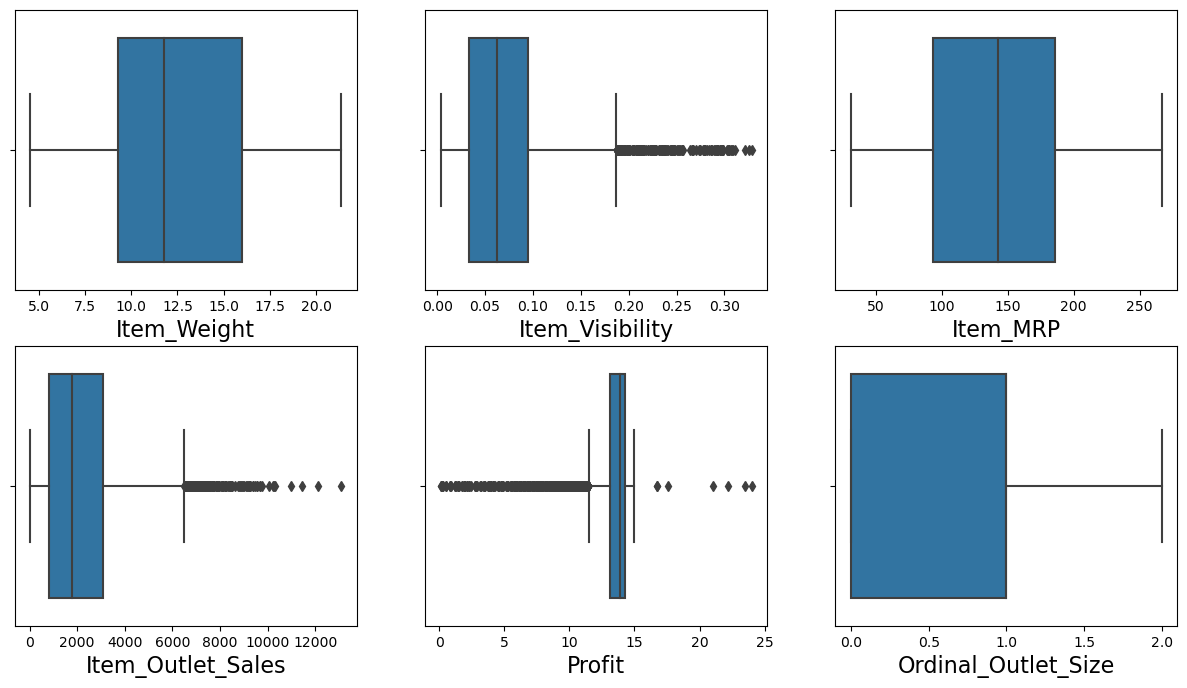

In [43]:
fig, ax  = plt.subplots(2,3, figsize=(15,8))
for variable, subplot in zip(df_numeric.columns, ax.flatten()):
    z = sb.boxplot(x=df_numeric[variable], orient="h", whis=1.5, ax=subplot)
    z.set_xlabel(variable, fontsize=16)

In [44]:
q1=df_numeric.quantile(0.25)
q3=df_numeric.quantile(0.75)

IQR = q3 - q1

lb = q1 - (1.5 * IQR)
ub = q3 + (1.5 * IQR)


In [45]:
df_numeric_nooutliers = df_numeric[~((df_numeric < lb ) | (df_numeric > ub)).any(axis=1)]
df_numeric_nooutliers.head()
# df_numeric_nooutliers = df_numeric[~((df_numeric < lb )| (df_numeric > ub))]

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Ordinal_Outlet_Size,freq_encodeded_item_type,Scaled_Item_Outlet_sales,min_max_scaled_Item_Outlet_Sales
0,9.30,0.016047,249.8,3735.1380,11.5,1.0,8.001877,0.910601,0.283587
1,5.92,0.019278,48.3,443.4228,14.3,1.0,5.221166,-1.018440,0.031419
2,17.50,0.016760,141.6,2097.2700,14.5,1.0,4.986507,-0.049238,0.158115
3,19.20,0.070482,182.1,732.3800,13.6,1.0,14.455004,-0.849103,0.053555
4,8.93,0.070482,53.9,994.7052,14.1,2.0,10.676992,-0.695373,0.073651


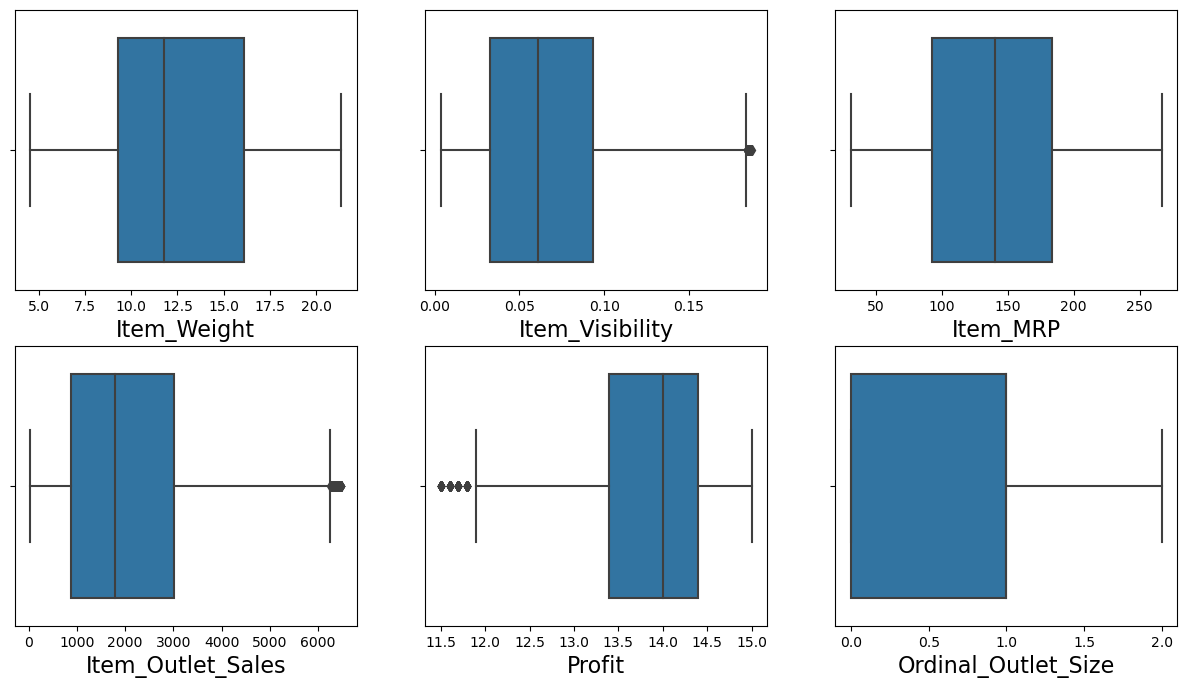

In [46]:
fig, ax  = plt.subplots(2,3, figsize=(15,8))
for variable, subplot in zip(df_numeric.columns, ax.flatten()):
    z = sb.boxplot(x=df_numeric_nooutliers[variable], orient="h", whis=1.5, ax=subplot)
    z.set_xlabel(variable, fontsize=16)

### z-score method


In [47]:
import scipy
from scipy import stats

In [48]:
df_drop2 = df[["Item_Visibility", "Item_Outlet_Sales", "Profit"]]
df_drop2.skew()

Item_Visibility      1.271273
Item_Outlet_Sales    1.177531
Profit              -3.379808
dtype: float64

In [49]:
import scipy.stats

df_drop2 = df[["Item_Visibility", "Item_Outlet_Sales", "Profit"]]
z_score_df = scipy.stats.zscore(df_drop2)
z_score_df[~((z_score_df < -3) | (z_score_df > 3))]
df_zscore=df_drop2[~((z_score_df < -3) | (z_score_df > 3))]
df_zscore.head()

,Item_Visibility,Item_Outlet_Sales,Profit
0,0.016047,3735.1380,11.5
1,0.019278,443.4228,14.3
2,0.016760,2097.2700,14.5
3,0.070482,732.3800,13.6
4,0.070482,994.7052,14.1


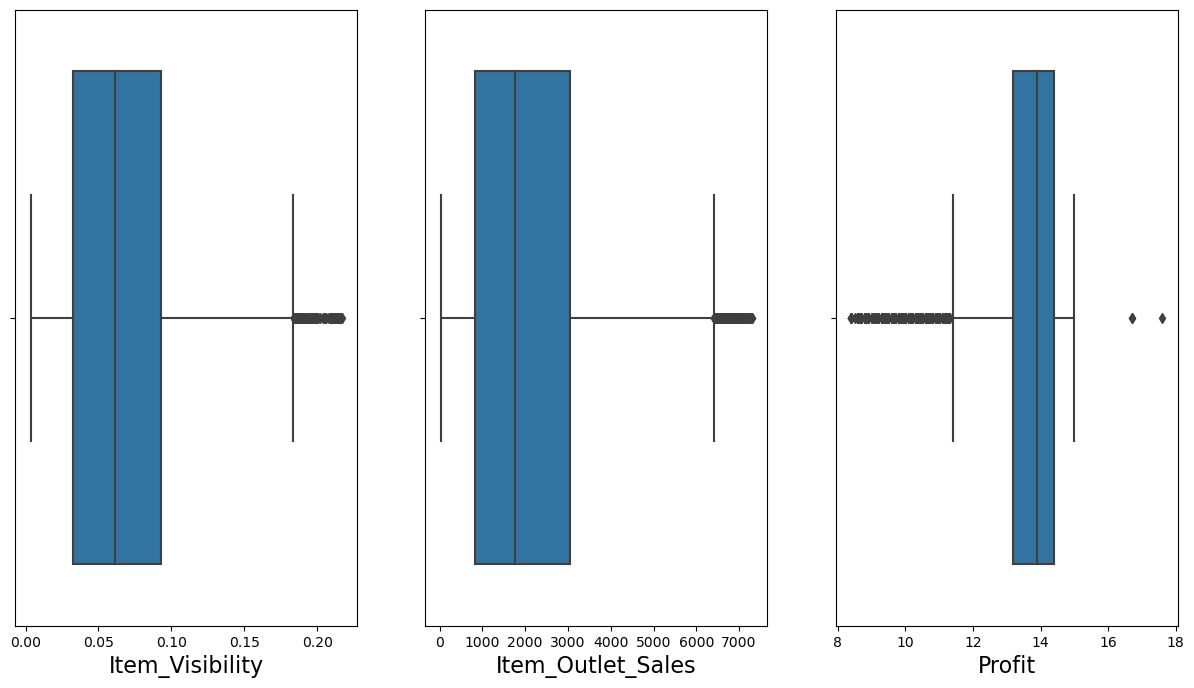

In [50]:
fig, ax  = plt.subplots(1,3, figsize=(15,8))
for variable, subplot in zip(df_zscore.columns, ax.flatten()):
    z = sb.boxplot(x=df_zscore[variable], orient="h", whis=1.5, ax=subplot)
    z.set_xlabel(variable, fontsize=16)

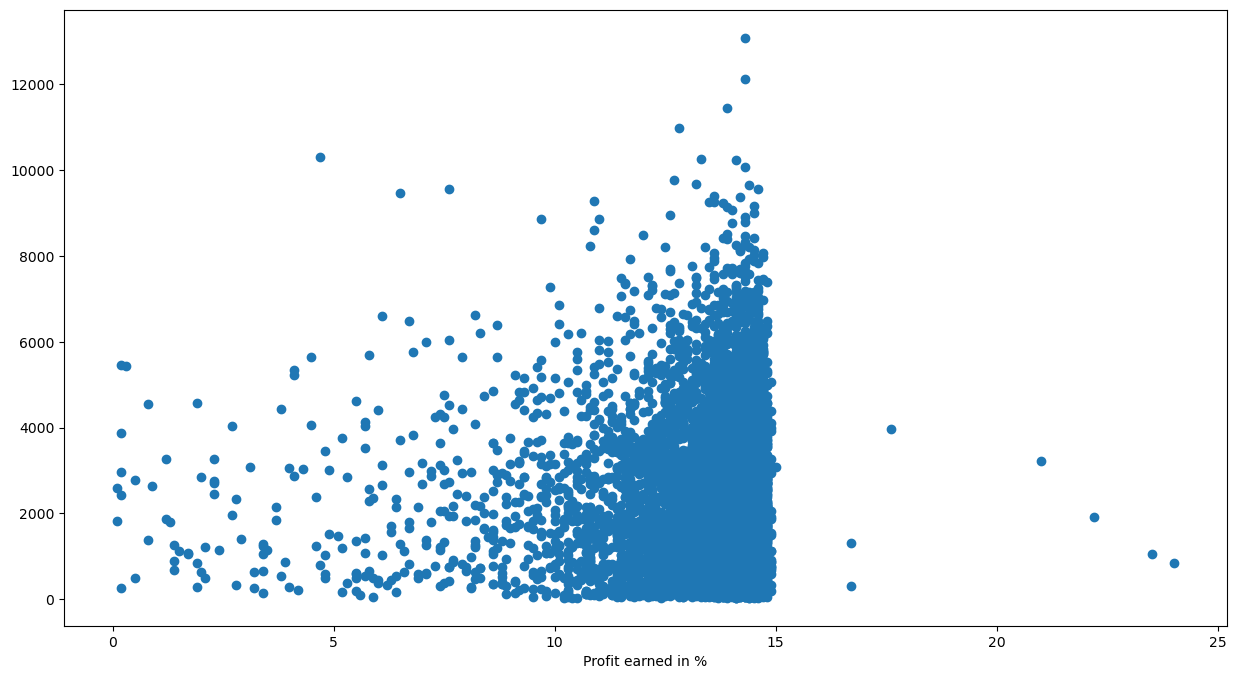

In [51]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df["Profit"], df["Item_Outlet_Sales"])
ax.set_xlabel("Profit earned in %")
plt.show()

In [52]:
df_sales_scatterplot = df[df["Profit"] < 15]

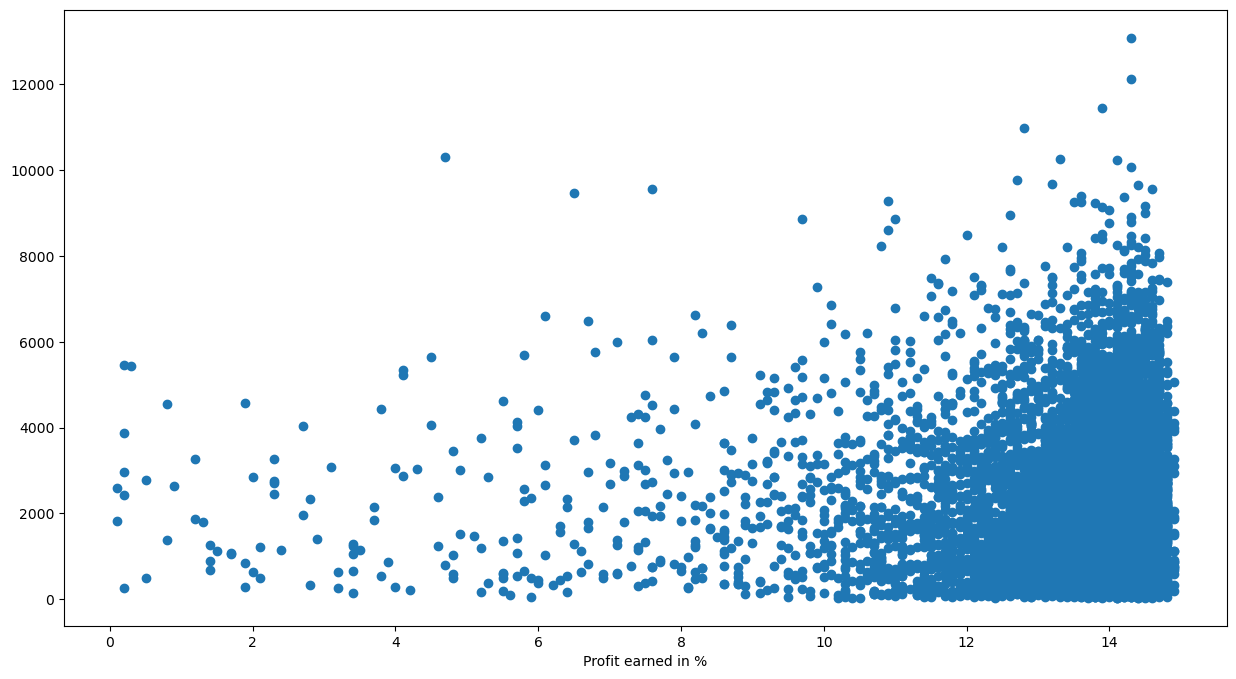

In [53]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df_sales_scatterplot["Profit"], df_sales_scatterplot["Item_Outlet_Sales"])
ax.set_xlabel("Profit earned in %")
plt.show()

### cap

In [54]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit', 'Ordinal_Outlet_Size',
       'freq_encodeded_item_type', 'Scaled_Item_Outlet_sales',
       'min_max_scaled_Item_Outlet_Sales'],
      dtype='object')

In [55]:
df_num = df[["Item_Visibility", "Item_Outlet_Sales", "Profit"]]

for i in df_num.columns:
    q1 = df_num[i].quantile(0.25)
    q3 = df_num[i].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    quntile10 = df_num[i].quantile(0.10)
    quntile90 = df_num[i].quantile(0.90)
    df_num[i] = np.where(df_num[i] < lb, quntile10, df_num[i])
    df_num[i] = np.where(df_num[i] > ub, quntile90, df_num[i])

df_num.skew()

Item_Visibility      0.705763
Item_Outlet_Sales    0.710554
Profit              -0.884417
dtype: float64

In [56]:
import datetime
from datetime import date
current_year = date.today().year
df["Outlet_Establishment_Year"] = pd.to_numeric(df["Outlet_Establishment_Year"])
df["Outlet_Age"] = current_year - df["Outlet_Establishment_Year"]


## Feature EngineerinG

In [57]:
import sklearn
from sklearn.model_selection import train_test_split

In [58]:
Y = df["Item_Outlet_Sales"]
X = df.drop(["Item_Outlet_Sales"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=100)
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)

X_train shape (6392, 17)
X_test shape (2131, 17)
Y_train shape (6392,)
Y_test shape (2131,)


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

np.random.randint(5,70,40)

array([16, 53, 26, 63, 33, 48, 25, 38, 40, 43, 65,  7, 64,  5, 33, 18, 62,
       57, 48, 11, 35, 56, 59,  9, 44, 12, 21, 23, 46, 56, 17, 28, 30, 58,
       50, 26, 69, 36, 39, 46])

In [60]:
data=pd.DataFrame({'Mileage':[15,14,17,7,10,7,20,21,18,11,7.9,8.6,12.3,17.1,19.4],
                 'Premium':[392.5,46.2,15.7,422.2,119.4,170.9,56.9,77.5,214,65.3,250,220,217.5,140.88,97.25]})

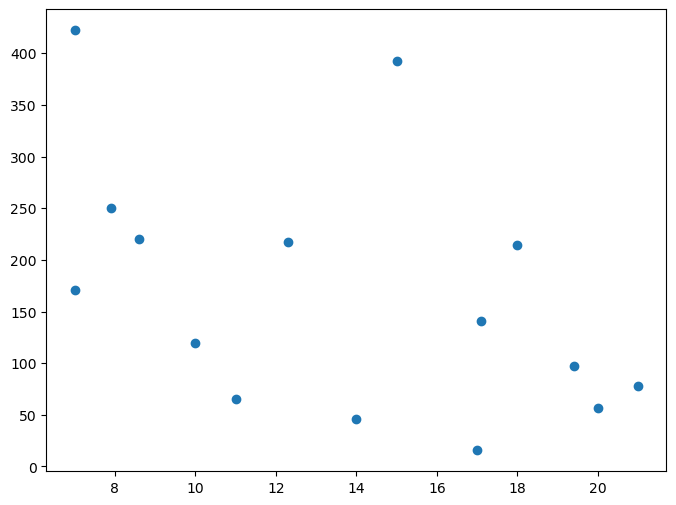

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(data["Mileage"], data["Premium"])

In [62]:
data.corr()

,Mileage,Premium
Mileage,1.000000,-0.475073
Premium,-0.475073,1.000000


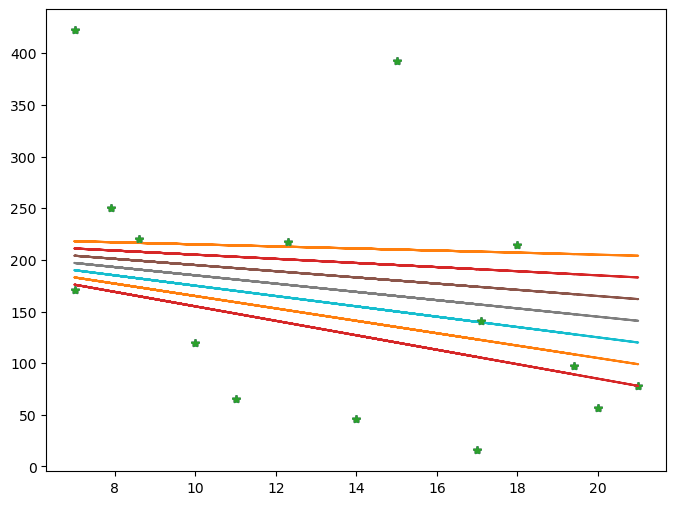

In [63]:
b1=5
b0=225
plt.figure(figsize=(8,6))
for b1 in [-1, -2, -3, -4, -5, -6, -7]:
    plt.plot(data["Mileage"], data["Premium"], "*")
    plt.plot(data["Mileage"], b1*data["Mileage"]+b0)
    plt.figure(1)

In [64]:
x=data["Mileage"]
y=data["Premium"]

b1 = np.sum(
    (x-x.mean()) * (y-y.mean())
) / np.sum (
    (x - x.mean()) ** 2
)

b1

-11.690503214338849

In [65]:
b0 = y.mean() - b1 * x.mean()
b0, b1

(327.08602066025105, -11.690503214338849)

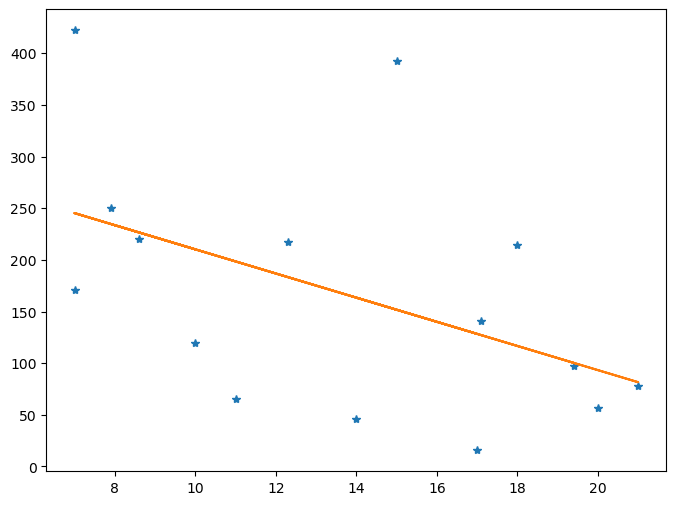

In [66]:
plt.figure(figsize=(8,6))
plt.plot(data["Mileage"], data["Premium"], "*")
plt.plot(data["Mileage"], b1*data["Mileage"]+b0)
plt.show()

In [67]:
# error
ypred = b1 * data["Mileage"] + b0
yact = data["Premium"]

err = yact - ypred
se = np.sum(err)
se

-1.4210854715202004e-13

In [68]:
sse = np.sum((yact-ypred)**2)
sse

159678.96224549576

In [69]:
mse = np.sum((yact-ypred)**2) / len(data)
mse

10645.264149699717

In [70]:
rmse = np.sqrt(mse)
rmse

103.17588938167539

In [71]:
ssr = np.sum( (y.mean() - ypred)**2)

In [72]:
sst = np.sum ( (y.mean() - yact)** 2)
sst

206222.20604

In [73]:
ssr/sst

0.22569462662753403

In [74]:
import statsmodels.api as sm

xc  = sm.add_constant(x)


mod=sm.OLS(y, xc)
ols_mod = mod.fit()

ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     3.789
Date:                Fri, 09 Aug 2024   Prob (F-statistic):             0.0735
Time:                        09:06:09   Log-Likelihood:                -90.831
No. Observations:                  15   AIC:                             185.7
Df Residuals:                      13   BIC:                             187.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        327.0860     87.035      3.758      0.002     139.057     515.115
Mileage      -11.6905      6.006     -1.947      0.074     -24.665       1.284
==============================================================================
Omnibus:                        3.225   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.770
Skew:                           0.841   Prob(JB):                        0.413
Kurtosis:                       3.057   Cond. No.                         44.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""